In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit


from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from lime.lime_text import LimeTextExplainer
from tensorflow.keras.callbacks import EarlyStopping



In [3]:

# Path to your CSV file
file_path = r"C:\Users\migue\Downloads\9e7fdfb8189f0cdf5d73a494e4a6392a-aaecbd14aeaa468cd749528f291aa8a30c2ea09e\9e7fdfb8189f0cdf5d73a494e4a6392a-aaecbd14aeaa468cd749528f291aa8a30c2ea09e\iris_dataset.csv"

# Read the CSV file into a Pandas DataFrame
irisdf = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(irisdf)

# Display basic statistics of the DataFrame
print("\nBasic statistics:")
print(irisdf.describe())

# Check for missing values
print("\nMissing values in each column:")
print(irisdf.isnull().sum())

# Display DataFrame info to ensure it is ML-ready
print("\nDataFrame info:")
print(irisdf.info())


Head of the DataFrame:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

    

In [4]:
X = irisdf.drop(columns='target')  # Features
y = irisdf['target']              # Target

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) #This 2 steps make the non-numerical values of y numerical

# Ensure there are no missing values
print("Missing values in dataset:\n", irisdf.isnull().sum())

# Preprocessing pipeline
features_num = X.columns  # All features are numerical

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),  # StandarScaler makes the data have mean 0 and variance 1 
    )

#X_to_split = X.preprocessor() 
# Split the dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y_encoded, test_size=0.75, random_state=42, stratify=y_encoded
)



# Apply preprocessing to the training and validation sets
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)


input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

# Print the transformed data shapes and normalized feature example
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("First row of X_train after preprocessing:", X_train[0])

Missing values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Input shape: [4]
X_train shape: (37, 4)
X_valid shape: (113, 4)
First row of X_train after preprocessing: [ 0.41159644 -1.74437157  0.41058885  0.48402956]


In [10]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(4,)),  # First hidden layer
    Dropout(0.3),  # Dropout with 30% probability
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout with 20% probability
    Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model summary
model.summary()


c:\Users\migue\miniconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,091 (35.51 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# why verbose 1???
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_valid, y_valid), verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.4363 - loss: 1.1098 - val_accuracy: 0.6726 - val_loss: 1.0269
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5961 - loss: 1.0244 - val_accuracy: 0.7876 - val_loss: 0.9426
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7677 - loss: 0.9240 - val_accuracy: 0.7965 - val_loss: 0.8648
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8901 - loss: 0.8601 - val_accuracy: 0.7965 - val_loss: 0.7896
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8251 - loss: 0.7793 - val_accuracy: 0.7965 - val_loss: 0.7180
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8635 - loss: 0.6585 - val_accuracy: 0.7876 - val_loss: 0.6533
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8518 - loss: 0.6265 - val_accuracy: 0.8053 - val_loss: 0.5970
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7851 - loss: 0.6041 - val_accuracy: 0.8053 - val_loss

Minimum Validation Loss: 0.1677
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━

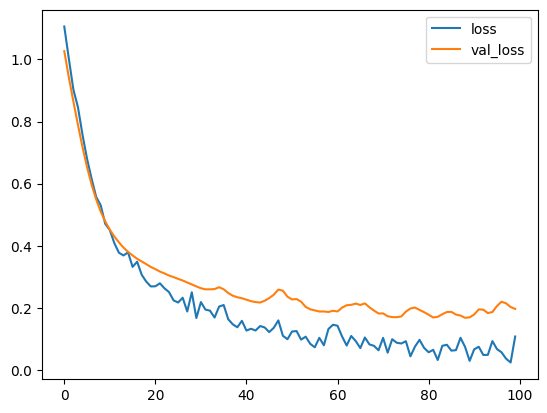

In [12]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
correct = 0
for i in range(len(y_valid)):
    if np.argmax(y_valid[i]) == np.argmax(model.predict(X_valid[i].reshape(1, -1))):
        correct += 1
percent_correct = correct * 100 / len(y_valid)
print('The percentage of correct assignments for the neural network is', percent_correct, '%')

In [ ]:
import lime
import lime.lime_tabular

# Use the actual feature names from iris dataset
feature_names = ["sepal length (cm)", "sepal width (cm)",  "petal length (cm)", "petal width (cm)"]  # Get only the first 4 feature names
origional_explainer = lime.lime_tabular.LimeTabularExplainer(
	X_valid, 
	feature_names=feature_names,
	class_names=["Iris-setosa","Iris-virginica", "Iris-versicolor"],
	discretize_continuous=0
)

# Create explanation for a single instance
origional_exp = origional_explainer.explain_instance(
	X_valid[0], 
	lambda x: model.predict(x), 
	num_features=4, 
	top_labels=3
)
print(origional_exp.as_list())
# Display the explanation
#Feature contributions QLIME \(\pi\)  (The numbers refer to the features in the following order: sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)):[0.10366189  0.01569134  0.98544151 -0.0016377 ]
#]
#Feature contributions LIME: [('petal width (cm)', -0.267829144579525), ('sepal length (cm)', 0.14283610989391415), ('petal length (cm)', -0.14165876551347437), ('sepal width (cm)', -0.11564151926700811)]

#origional_exp.show_in_notebook(show_table=True, show_all=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[('petal width (cm)', -0.267829144579525), ('sepal length (cm)', 0.14283610989391415), ('petal length (cm)', -0.14165876551347437), ('sepal width (cm)', -0.11564151926700811)]


In [42]:
import numpy as np
import pennylane as qml
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the iris dataset
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # Labels

iris.df = pd.DataFrame(X, columns=iris.feature_names)
print(iris.df.head())
# Convert features to binary values based on the mean
mean_values = np.mean(X, axis=0)
binary_vectorized_data = (X > mean_values).astype(int)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_vectorized_data, y, test_size=0.2, random_state=42)

# Define a simple neural network classifier
# def build_nn_classifier(input_dim):
#     model = keras.Sequential([
#         layers.Dense(10, activation='relu', input_shape=(input_dim,)),
#         layers.Dense(10, activation='relu'),
#         layers.Dense(3, activation='softmax')  # 3 output classes
#     ])
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# Build and train the neural network classifier
nn_classifier = model # build_nn_classifier(X_train.shape[1])
#nn_classifier.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Quantum function to encode and flip bits
def encode_and_flip(features, flip_index=None, shots=None):
    dev = qml.device("default.qubit", wires=len(features), shots=shots)
    
    @qml.qnode(dev)
    def circuit():
        for i, f in enumerate(features):
            if i == flip_index: # and f == 1:   ;;  This line is the original code commented out
                # 1->0 => RY(0),
                #theta = 0
                theta = f * (np.pi / 2)            
                qml.PauliX(wires=i)
            else:
                theta = f * (np.pi / 2)
 
            qml.RY(theta, wires=i)
            
        return qml.probs(wires=range(len(features)))
    
    return circuit()

# Measure and map quantum state to classical bitstring
def measure_and_map_to_classical(features, flip_index=None, shots=None):
    probs = encode_and_flip(features, flip_index, shots=shots)
    
    measured_state = np.random.choice(len(probs), p=probs)
    bin_string = f"{measured_state:0{len(features)}b}"
    print("jnndjd ", probs)
    return np.array([int(bit) for bit in bin_string])

# Explain function using Q-LIME
def explain(vector, model, full_superposition=True, shots=None):
    original_pred = model.predict(vector.reshape(1, -1))[0]
    contributions = np.zeros(len(vector))
    
    for i in range(len(vector)):
        if vector[i] == 1 or full_superposition:
            new_vec = measure_and_map_to_classical(vector, flip_index=i,  shots=shots)
            new_pred = model.predict(new_vec.reshape(1, -1))[0]
            contributions[i] = original_pred[np.argmax(original_pred)] - new_pred[np.argmax(original_pred)]
    
    return contributions

# Example usage
sample_vector = X_test[0] 

contributions = explain(sample_vector, nn_classifier, shots=100)
print("Feature contributions:", contributions)
print(model.predict(sample_vector.reshape(1, -1)))
print("Sample measured ", sample_vector) # Pick a sample


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
jnndjd  [0.08 0.13 0.15 0.16 0.   0.   0.   0.   0.11 0.13 0.12 0.12 0.   0.
 0.   0.  ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
jnndjd  [0.   0.   0.   0.   0.12 0.09 0.1  0.12 0.   0.   0.   0.   0.09 0.22
 0.07 0.19]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
jnndjd  [0.08 0.14 0.17 0.11 0.   0.   0.   0.   0.12 0.1  0.1  0.18 0.   0.
 0.   0.  ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
jnndjd  [0.11 0.16 0.12 0.12 0.   0.   0.   0.   0.12 0.11 0.18 0.08 0.   0.
 0.   0.  ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/s

In [16]:
correct = 0

for i in range(len(y_valid)):
    if np.argmax(y_valid[i]) == np.argmax(model.predict(X_valid[i].reshape(1, -1))):
        correct += 1
percent_correct = correct * 100 / len(y_valid)
print('The percentage of correct assignments for the neural network is', percent_correct, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━